# **LGBM & XGBM**

**Test dataset.**

**Exploratory Data Analysis (EDA):**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [2]:
import pandas as pd
from pandas import*

In [3]:
data=read_csv('Titanic_test.csv')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [6]:
# Renoving rows with NaN values .
data=data.dropna()

# Write the cleaned dataframe back to a new csv file .
data.to_csv('cleaned_file.csv',index=False)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [7]:
data[data.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
data.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [9]:
data.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.004934,0.055488,-0.087828,-0.122551,-0.097346
Pclass,0.004934,1.000000,-0.410924,-0.132790,0.006411,-0.298186
Age,0.055488,-0.410924,1.000000,0.062530,0.051144,0.180567
SibSp,-0.087828,-0.132790,0.062530,1.000000,0.252194,0.213014
Parch,-0.122551,0.006411,0.051144,0.252194,1.000000,0.395685
Fare,-0.097346,-0.298186,0.180567,0.213014,0.395685,1.000000


In [10]:
import seaborn as sns
from seaborn import*

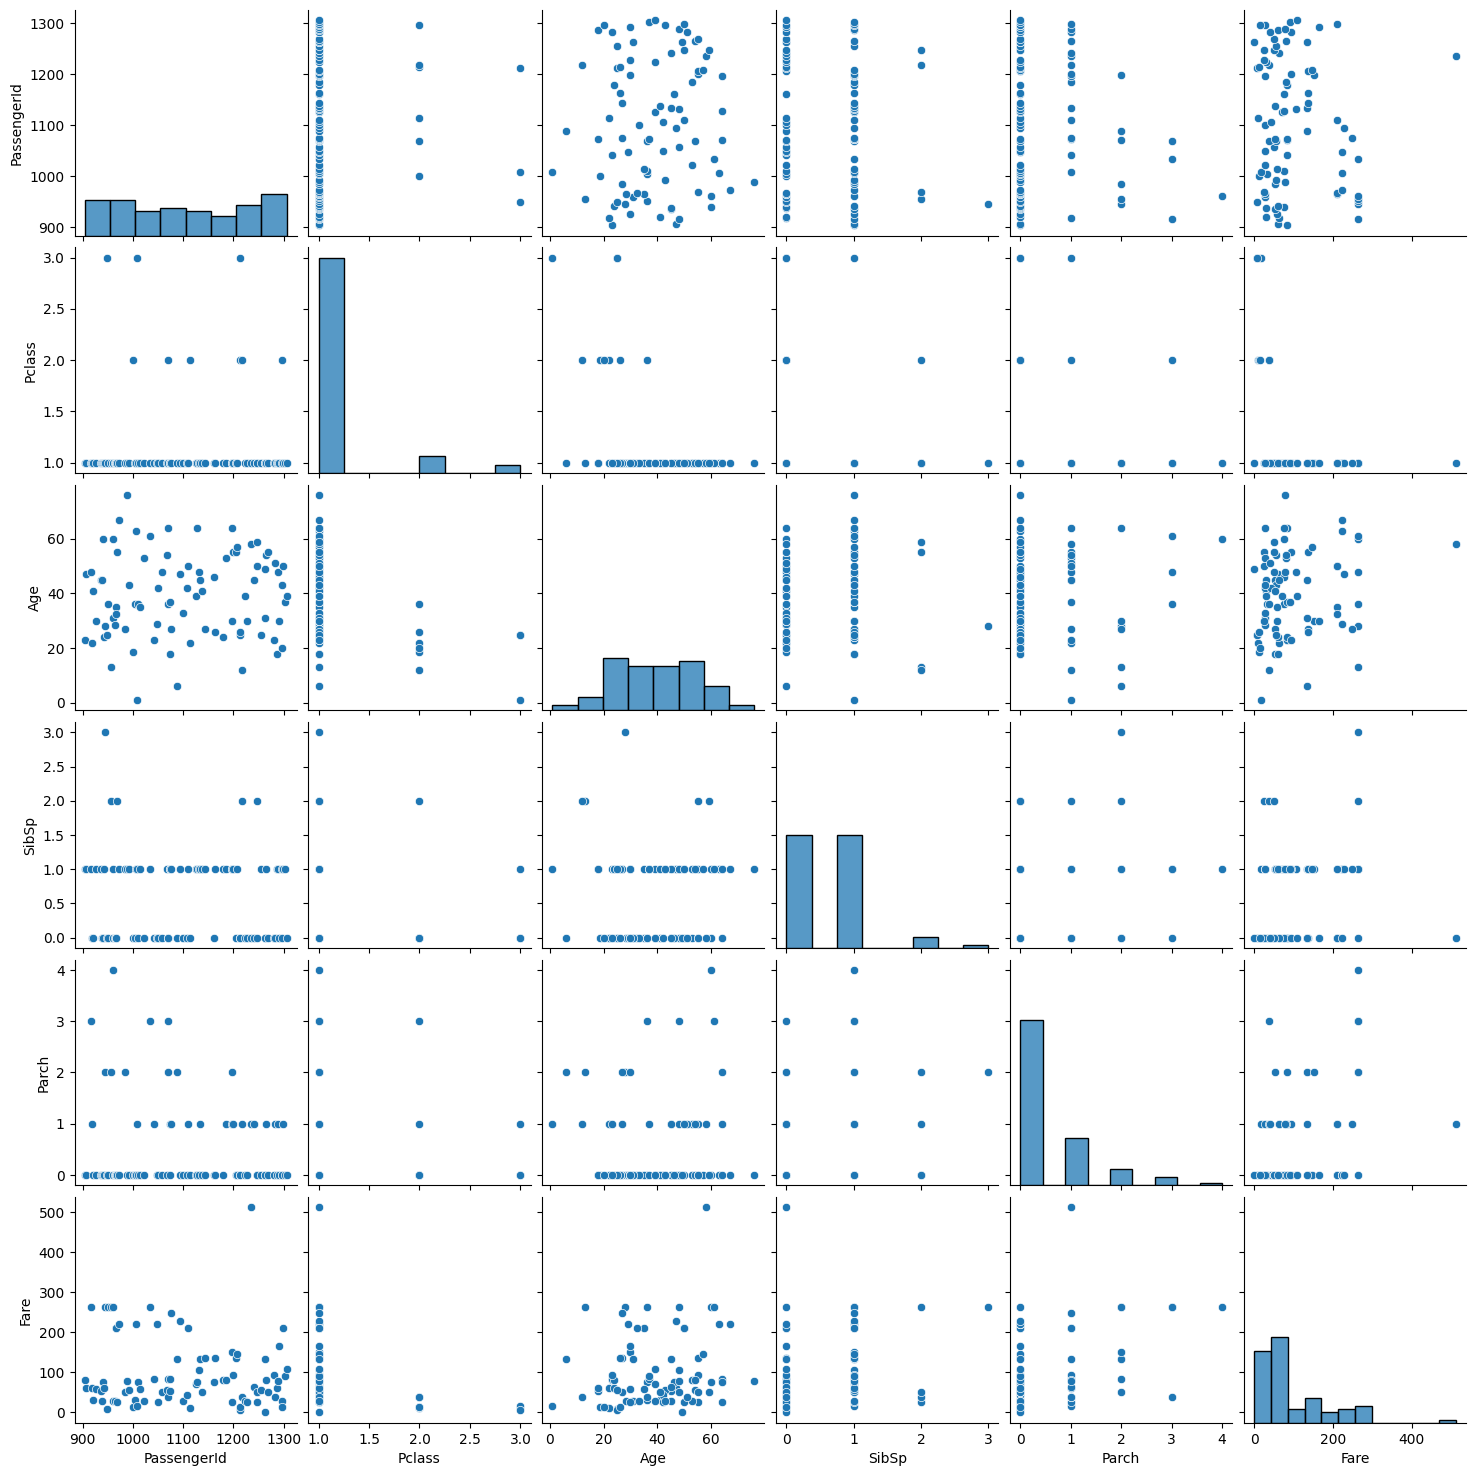

In [11]:
pairplot(data)

**Data Preprocessing:**

In [12]:
from sklearn.preprocessing import  LabelEncoder

In [13]:
label_encoder={}
for column in data.select_dtypes(include=['object']).columns:
  label_encoder[column]=LabelEncoder()
  data[column]=label_encoder[column].fit_transform(data[column])
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,72,0,23.0,1,0,32,82.2667,12,2
14,906,1,15,0,47.0,1,0,65,61.1750,58,2
24,916,1,66,0,48.0,1,3,53,262.3750,15,0
26,918,1,60,0,22.0,0,1,9,61.9792,10,0
28,920,1,9,1,41.0,0,0,7,30.5000,2,2


In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

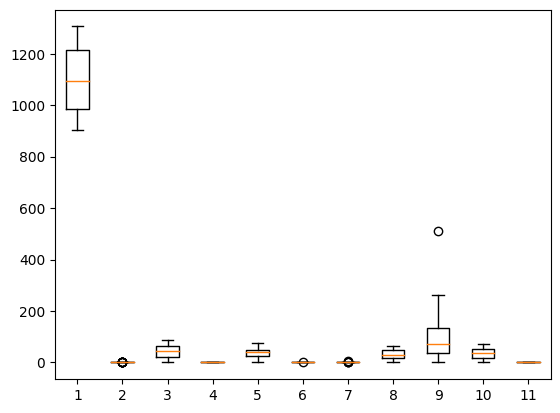

In [15]:
boxplot(data)
show()

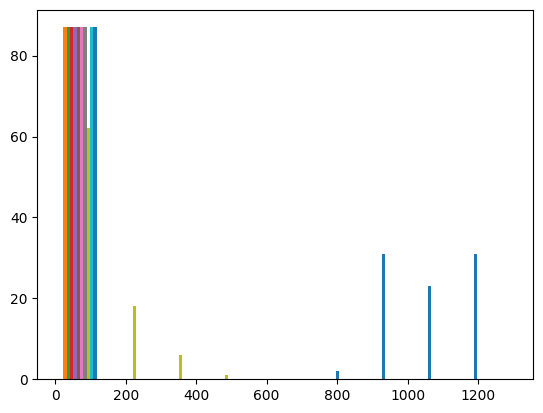

In [16]:
hist(data)
show()

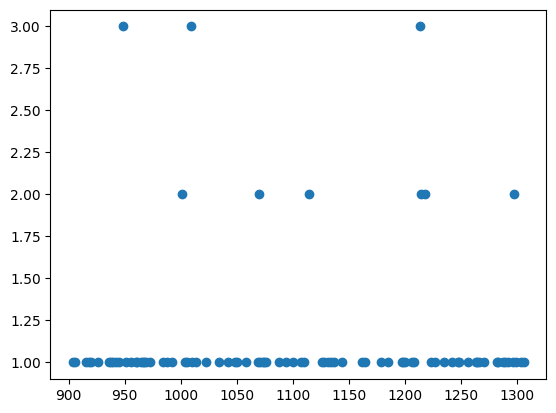

In [19]:
scatter(data['PassengerId'],data['Pclass'])

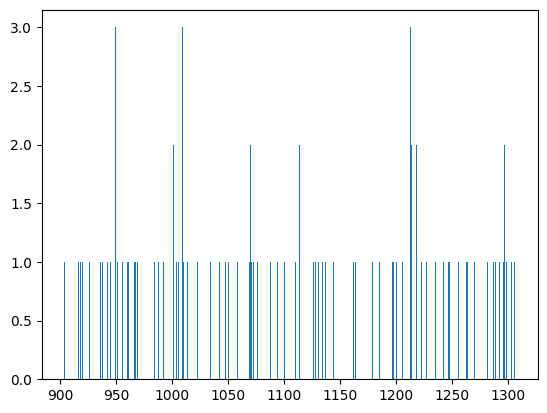

In [20]:
bar(data['PassengerId'],data['Pclass'])
show()

**Building Predictive Models:**

In [21]:
# Independent variable .
x=data.iloc[:,:-1]

# Dependent variable .
y=data.iloc[:,-1]
x.shape,y.shape

((87, 10), (87,))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train,y_train

(     PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  \
 272         1164       1    19    0  26.0      1      0      23  136.7792   
 371         1263       1    86    0  31.0      0      0      26  134.5000   
 57           949       3     0    1  25.0      0      0      39    7.6500   
 131         1023       1    39    1  53.0      0      0      11   28.5000   
 182         1074       1    53    0  18.0      1      0      10   53.1000   
 ..           ...     ...   ...  ...   ...    ...    ...     ...       ...   
 81           973       1    78    1  67.0      1      0      43  221.7792   
 308         1200       1    42    1  55.0      1      1      20   93.5000   
 356         1248       1    11    0  59.0      2      0      16   51.4792   
 68           960       1    81    1  31.0      0      0      36   28.5375   
 242         1134       1    74    1  45.0      1      1      26  134.5000   
 
      Cabin  
 272     45  
 371     60  
 57      67  
 131  

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb_model=XGBClassifier()

In [26]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
y_train_pred=xgb_model.predict(x_train)
y_train_pred

array([0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0])

In [28]:
y_test_pred=xgb_model.predict(x_test)
y_test_pred

array([2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2])

In [29]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('\nXGBOOST MODEL EVALUATION :')
print(classification_report(y_test,xgb_model.predict(x_test)))
print('CONFUSION MATRIX :')
print(confusion_matrix(y_test,xgb_model.predict(x_test)))


XGBOOST MODEL EVALUATION :
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           2       0.80      0.73      0.76        11

    accuracy                           0.72        18
   macro avg       0.71      0.72      0.71        18
weighted avg       0.73      0.72      0.72        18

CONFUSION MATRIX :
[[5 2]
 [3 8]]


In [30]:
!pip install lightgbm

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from lightgbm import LGBMClassifier

In [34]:
lgb_model=LGBMClassifier()
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 69, number of used features: 9
[LightGBM] [Info] Start training from score -0.545227
[LightGBM] [Info] Start training from score -4.234107
[LightGBM] [Info] Start training from score -0.901902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

LGBMClassifier()

In [35]:
y_pred=lgb_model.predict(x_train)
y_pred

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 0])

In [36]:
accuracy=accuracy_score(y_train,y_pred)
print('LightGBM Accuracy :',accuracy)

LightGBM Accuracy : 0.9130434782608695


In [37]:
print('\nLightGBM Model Evaluation :')
print(classification_report(y_test,lgb_model.predict(x_test)))
print('Confusion Matrix :')
print(confusion_matrix(y_test,lgb_model.predict(x_test)))


LightGBM Model Evaluation :
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           2       0.90      0.82      0.86        11

    accuracy                           0.83        18
   macro avg       0.82      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18

Confusion Matrix :
[[6 1]
 [2 9]]


**Comparative Analysis:**

In [38]:
import lightgbm as lgb
import xgboost as xgb

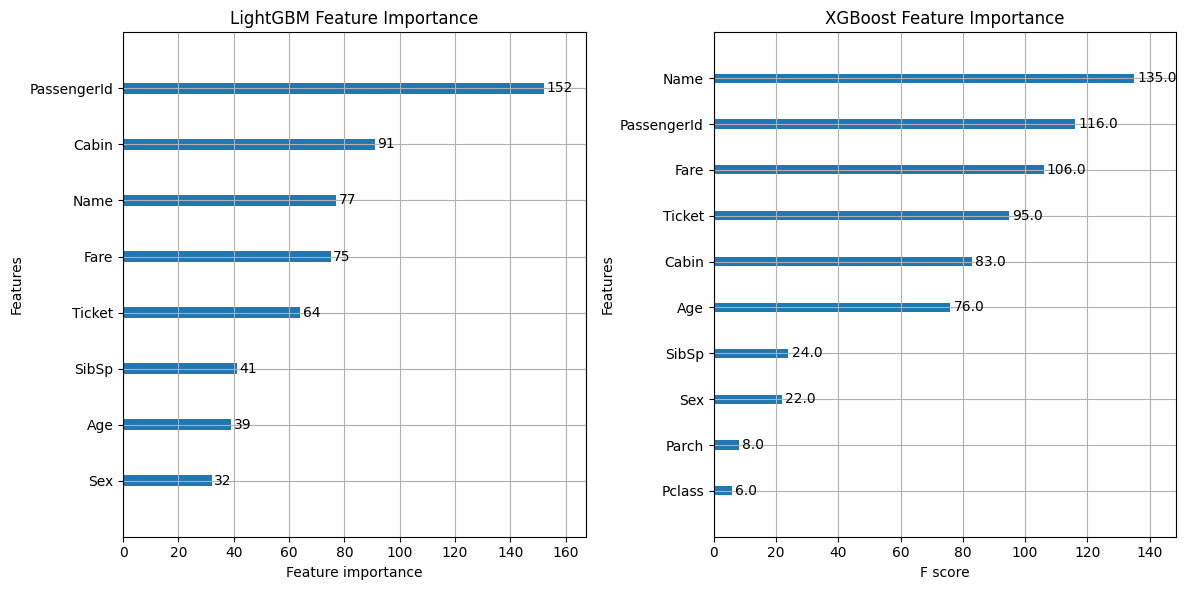

In [39]:
fig,ax=subplots(1,2,figsize=(12,6))
lgb.plot_importance(lgb_model,ax=ax[0])
ax[0].set_title('LightGBM Feature Importance')
xgb.plot_importance(xgb_model,ax=ax[1])
ax[1].set_title('XGBoost Feature Importance')
tight_layout()
show()